In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statistics

In [3]:
from google.colab import drive
drive.mount('/content/drive')
#setting the directory to the proper folder
import os
os.chdir("/content/drive/My Drive/Stock Algorithim/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv("Datasets/ReturnLists.csv")
df.columns = ['0','SPYRet','AlgoRet']
df = df.drop('0', axis=1)
print(df.head())

     SPYRet   AlgoRet
0  0.001859  0.001859
1 -0.002461  0.002461
2 -0.000040  0.000040
3 -0.014115 -0.014115
4  0.001477  0.001477


In [7]:
print(df.shape)
print("Sum of Algo Rets: ", df['AlgoRet'].sum())
print("Sum of SPY Rets: ", df['SPYRet'].sum())

(1491, 2)
Sum of Algo Rets:  5.7167922563424485
Sum of SPY Rets:  0.8070410865142486


In [8]:
AlgoRetList = list()
for i in range(0,len(df)):
    AlgoRetList.append(df.loc[i,'AlgoRet'])

In [9]:
CompRetAlgoList = list()
CompRetSPList = list()
CompRetAlgo = 1
CompRetSP = 1
for i in range(0,len(df)):
    if i==0:
        CompRetAlgo = (1+df.loc[i,'AlgoRet'])
    else:
        CompRetAlgo = CompRetAlgo * (1+df.loc[i,'AlgoRet'])

    CompRetAlgoList.append(CompRetAlgo)

    if i == 0:
        CompRetSP = (1 + df.loc[i,'SPYRet'])
    else:
        CompRetSP = CompRetSP * (1 + df.loc[i,'SPYRet'])

    CompRetSPList.append(CompRetSP)

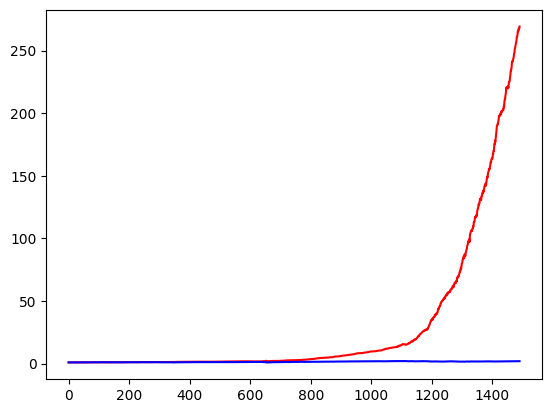

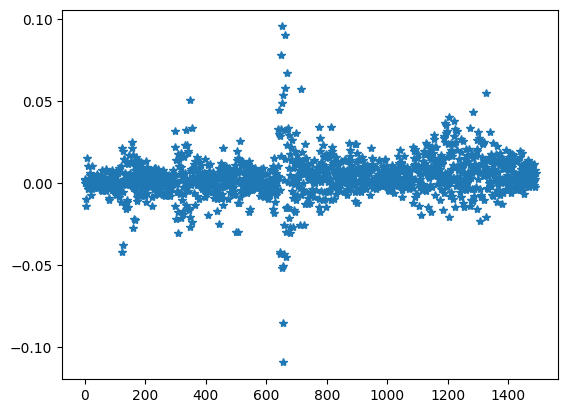

In [10]:
fig = plt.figure()
plt.plot(CompRetAlgoList,'r')
plt.plot(CompRetSPList,'b')

fig = plt.figure()
plt.plot(AlgoRetList,'*')

plt.show()

In [11]:
NumberofPositveRets = [i for i in AlgoRetList if i > 0]
NumberofNegativeRets = [i for i in AlgoRetList if i<=0]

PctofSuccess = len(NumberofPositveRets)/len(AlgoRetList)

In [13]:
print("Average returns of gains: ", statistics.mean(NumberofPositveRets))
print("Standard deviation of gains: ", statistics.stdev(NumberofPositveRets))
print("Averasge returns of losses: ", statistics.mean(NumberofNegativeRets))
print("Standard deviation of losses: ", statistics.stdev(NumberofNegativeRets))
print(PctofSuccess)

print("Sum of Algo Rets: ", sum(AlgoRetList))

Average returns of gains:  0.009037246765362378
Standard deviation of gains:  0.009577210287635403
Averasge returns of losses:  -0.006958098947653822
Standard deviation of losses:  0.00980394249702672
0.6747149564050973
Sum of Algo Rets:  5.716792256342441
